In [1]:
import pandas as pd

dataset = pd.read_csv("C:/Users/VICTUS/Desktop/PyhtonAdventure/Datasets/earthquake_1995-2023.csv")
df = pd.DataFrame(dataset)
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


## df nin kopyasını oluştur 

In [2]:
df_copy = df.copy()

## df_copy'den "alert" sütunundaki NaN değerleri sil

In [3]:
df_copy.dropna(subset=["alert"] , inplace=True)
df_copy.tail()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
451,"M 6.8 - 54 km N of Vallenar, Chile",6.8,30-01-2013 20:15,6,7,green,0,771,us,596,0.0000,19.3,mww,45.000,-28.0940,-70.653,"Vallenar, Chile",South America,Chile
458,"M 7.4 - 33 km S of Champerico, Guatemala",7.4,07-11-2012 16:35,8,7,yellow,0,1455,us,751,0.0000,25.5,mww,24.000,13.9880,-91.895,"Champerico, Guatemala",NaN,NaN
475,M 8.2 - off the west coast of northern Sumatra,8.2,11-04-2012 10:43,9,6,green,0,1213,us,341,0.0000,14.9,mwc,25.100,0.8020,92.463,off the west coast of northern Sumatra,NaN,NaN
476,M 8.6 - off the west coast of northern Sumatra,8.6,11-04-2012 08:38,9,7,yellow,0,2048,official,499,0.0000,16.6,mw,20.000,2.3270,93.063,off the west coast of northern Sumatra,NaN,NaN
542,"M 7.2 - 12km SW of Delta, B.C., MX",7.2,04-04-2010 22:40,9,9,red,0,2910,ci,10,0.5137,239.0,mw,9.987,32.2862,-115.295,"Delta, B.C., MX",North America,Mexico


## df_copy'den gereksiz sütunları sil

In [4]:
df_copy.drop(['continent','country','net','title','date_time','location','magType'] , axis=1 , inplace=True)

## Dataframe'in indexlerini resetle (drop işleminden sonra dataframe'in indexleri de siliniyor)

In [5]:
df_copy = df_copy.reset_index(drop=True)

In [6]:
df_copy.head()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,green,0,657,114,7.177,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,yellow,0,775,92,0.679,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,green,0,899,70,1.634,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,green,1,860,173,0.907,36.0,32.571,54.3844,-160.6990
4,6.6,5,4,green,1,802,95,2.454,37.0,10.000,20.0196,-61.0955


## unique() fonksiyonu kullanarak df_copy'nin alert sütununda kaç farklı değer olduğunu ve bunların bilgilerini getir

In [7]:
df_copy.alert.unique()

array(['green', 'yellow', 'orange', 'red'], dtype=object)

## map() fonksiyonu kullanarak alert sütunundaki kategorik değişkenleri nümerikler ile değiştir

In [8]:
color_to_numeric = {"green": "0", "yellow": "1", "orange": "2","red":"3"}

# 'B' sütununu dönüştürelim
df_copy['alert'] = df_copy['alert'].map(color_to_numeric)

In [9]:
df_copy.alert.unique()

array(['0', '1', '2', '3'], dtype=object)

In [10]:
df_copy.alert.isnull().sum()

0

In [11]:
df_copy.tail()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
444,6.8,6,7,0,0,771,596,0.0000,19.3,45.000,-28.0940,-70.653
445,7.4,8,7,1,0,1455,751,0.0000,25.5,24.000,13.9880,-91.895
446,8.2,9,6,0,0,1213,341,0.0000,14.9,25.100,0.8020,92.463
447,8.6,9,7,1,0,2048,499,0.0000,16.6,20.000,2.3270,93.063
448,7.2,9,9,3,0,2910,10,0.5137,239.0,9.987,32.2862,-115.295


## eğitilecek model için gerekli bağımlı bağımsız değişkenleri seç

In [12]:
x = df_copy.drop(['alert'],axis=1)
y = df_copy.loc[:,['alert']].values.reshape(-1,1)

## train_test_split kullanarak eğitim ve test setlerini oluştur

In [13]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=60)

## RandomForestClassifier üzerinden bir nesne oluştur ve fit ile modeli eğit

In [14]:
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(n_estimators=92,random_state=60)

lr.fit(xtrain,ytrain)

c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=92, random_state=60)

## xtest üzerinden tahminleme işlemi yap ve y_pred değişkenine ata

In [15]:
y_pred = lr.predict(xtest)

In [16]:
lr.score(xtest,y_pred)

1.0

## modelin accuracy score'una bak

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(ytest,y_pred)
acc

0.9222222222222223

## model için optimum accuracy score'u verecek n_estimators değerine for döngüsü ile eriş ve görselleştir

import matplotlib.pyplot as plt

scores=[]

for i in range(1,150):
    lr2 = RandomForestClassifier(n_estimators=i,random_state=60)
    lr2.fit(xtrain,ytrain)
    y_pred = lr2.predict(xtest)
    acc = accuracy_score(ytest,y_pred)
    scores.append(acc)

plt.plot(range(1,150),scores)
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(ytest,y_pred)
cm


array([[77,  1,  1,  0],
       [ 1,  4,  0,  0],
       [ 0,  4,  1,  0],
       [ 0,  0,  0,  1]], dtype=int64)

## manuel tahminleme işlemi yap

In [19]:
lr.predict([x.iloc[448,:]])

c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype=object)

## Veriyi Görselleştir

In [20]:
import seaborn as sns

In [21]:
x.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907,36.0,32.571,54.3844,-160.6990
4,6.6,5,4,1,802,95,2.454,37.0,10.000,20.0196,-61.0955


In [22]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,1
2,0
3,0
4,0


Text(0, 0.5, 'alert')

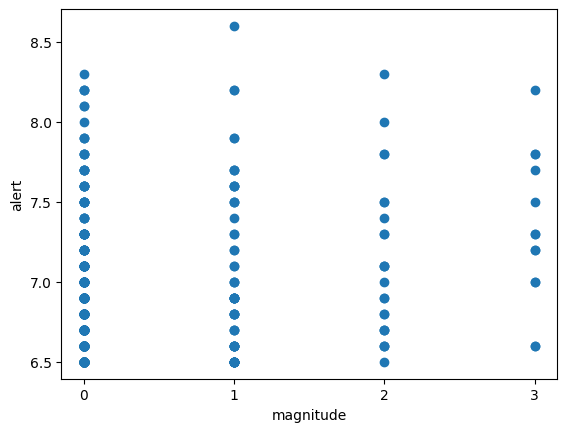

In [23]:
plt.scatter(y.iloc[:,0],x.iloc[:,0])
plt.xlabel("magnitude")
plt.ylabel("alert")

In [24]:
groupby_alert = df_copy.groupby(["alert"]).mean().reset_index()
groupby_alert

,alert,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,0,6.860057,4.467422,5.220963,0.736544,774.611898,50.920680,2.673447,26.354929,119.886150,-3.264227,36.794601
1,1,7.033898,7.644068,7.118644,0.711864,1032.220339,71.186441,1.817477,32.198305,45.462831,12.235505,30.511417
2,2,7.125000,8.416667,7.916667,0.500000,1374.041667,17.833333,1.924792,19.791667,40.053000,18.034108,30.091413
3,3,7.323077,8.307692,8.307692,0.384615,2508.461538,52.000000,1.470362,40.969231,18.501692,27.177738,27.607685


In [25]:
max(groupby_alert["magnitude"])

7.323076923076924

In [26]:
len(y_pred)

90

In [27]:
len(x.iloc[:,0])

449

In [28]:
len(x)

449

In [29]:
y = pd.DataFrame(y)
y.head()

,0
0,0
1,1
2,0
3,0
4,0


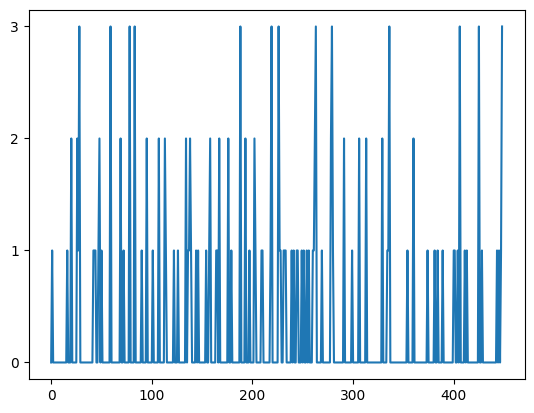

In [30]:
plt.scatter(range(0,449),x.magnitude)
plt.plot(lr.predict(x))

In [31]:
lr.predict([x.iloc[448,:]])

c:\Users\VICTUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['3'], dtype=object)

In [32]:
x["alerts"] = lr.predict(x)
x.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,alerts
0,6.5,7,4,0,657,114,7.177,25.0,192.955,-13.8814,167.1580,0
1,6.5,8,6,0,775,92,0.679,40.0,69.727,12.8140,-88.1265,1
2,6.6,7,5,0,899,70,1.634,28.0,171.371,-38.1911,-70.3731,0
3,7.2,6,6,1,860,173,0.907,36.0,32.571,54.3844,-160.6990,0
4,6.6,5,4,1,802,95,2.454,37.0,10.000,20.0196,-61.0955,0


<Axes: xlabel='cdi', ylabel='depth'>

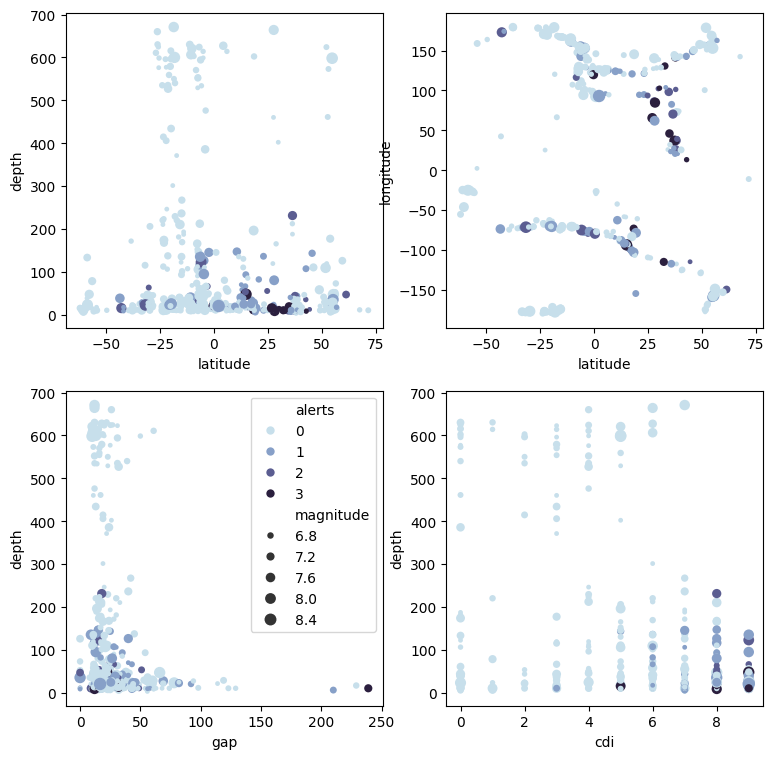

In [33]:
import seaborn as sns
f, ax = plt.subplots(2,2,figsize=(9, 9))
sns.scatterplot(x="latitude", y="depth",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend=None,
                data=x, ax=ax[0,0])

sns.scatterplot(x="latitude", y="longitude",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend=None,
                data=x, ax=ax[0,1])

a = sns.scatterplot(x="gap", y="depth",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend="brief",
                data=x, ax=ax[1,0])

sns.scatterplot(x="cdi", y="depth",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend=None,
                data=x, ax=ax[1,1])

## df'nin 2. kopyasını oluştur

In [34]:
df_copy_2 = df.copy()
df_copy_2.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",NaN,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [35]:
df_copy_2 = df_copy_2[df_copy_2.alert.isnull() == True].reset_index(drop=True)
df_copy_2.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.0,54.490,-160.796,Alaska Peninsula,NaN,NaN
1,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,11-01-2022 12:39,0,3,NaN,1,650,at,97,1.616070,108.0,Mi,37.0,52.502,-168.080,"Nikolski, Alaska",NaN,NaN
2,"M 6.5 - 71 km SE of Nikolski, Alaska",6.5,11-01-2022 12:39,0,3,NaN,1,650,pt,23,0.000000,208.8,Mi,37.0,52.502,-168.080,"Nikolski, Alaska",NaN,NaN
3,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,11-01-2022 11:35,0,4,NaN,1,691,at,50,0.936943,126.0,Mi,33.0,52.480,-167.736,"Nikolski, Alaska",NaN,NaN
4,"M 6.7 - 91 km SE of Nikolski, Alaska",6.7,11-01-2022 11:35,0,4,NaN,1,691,pt,20,0.000000,205.2,Mi,33.0,52.480,-167.736,"Nikolski, Alaska",NaN,NaN


In [36]:
df_copy_2.drop(['continent','country','net','title','date_time','location','magType'] , axis=1 , inplace=True)
df_copy_2.head()

,magnitude,cdi,mmi,alert,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,7.3,0,5,NaN,1,820,79,0.879451,172.8,21.0,54.490,-160.796
1,6.5,0,3,NaN,1,650,97,1.616070,108.0,37.0,52.502,-168.080
2,6.5,0,3,NaN,1,650,23,0.000000,208.8,37.0,52.502,-168.080
3,6.7,0,4,NaN,1,691,50,0.936943,126.0,33.0,52.480,-167.736
4,6.7,0,4,NaN,1,691,20,0.000000,205.2,33.0,52.480,-167.736


In [37]:
x2 = df_copy_2.drop(["alert"],axis=1)
x2.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,7.3,0,5,1,820,79,0.879451,172.8,21.0,54.490,-160.796
1,6.5,0,3,1,650,97,1.616070,108.0,37.0,52.502,-168.080
2,6.5,0,3,1,650,23,0.000000,208.8,37.0,52.502,-168.080
3,6.7,0,4,1,691,50,0.936943,126.0,33.0,52.480,-167.736
4,6.7,0,4,1,691,20,0.000000,205.2,33.0,52.480,-167.736


In [38]:
predicted_alert_values = lr.predict(x2)

In [39]:
x2["alerts"] = predicted_alert_values
(x2.alerts == '2').sum()

3

In [40]:
x2[x2["alerts"] == '2'].head()


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,alerts
6,7.1,9,8,0,1686,0,0.984,23.0,48.0,18.5499,-98.4887,2
148,7.9,9,9,0,1870,774,0.000,11.3,19.0,31.0020,103.3220,2
316,7.9,8,9,0,1750,0,0.000,0.0,4.2,63.5141,-147.4530,2


In [41]:
x[x["alerts"] == '2'].head()


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,alerts
20,6.8,9,7,1,1159,152,0.709,28.0,65.842,-2.8510,-79.8001,2
26,7.5,9,9,0,1411,135,0.850,17.0,10.000,38.0235,37.2030,2
48,6.6,9,8,0,1043,141,8.454,34.0,12.000,29.7263,102.2790,2
69,6.6,9,8,0,1012,0,2.685,13.0,13.000,37.8167,101.2990,2
95,7.3,9,9,0,1025,0,4.655,9.0,10.000,34.5861,98.2551,2


In [42]:
(x.alerts == '1').sum()

63

<Axes: xlabel='latitude', ylabel='longitude'>

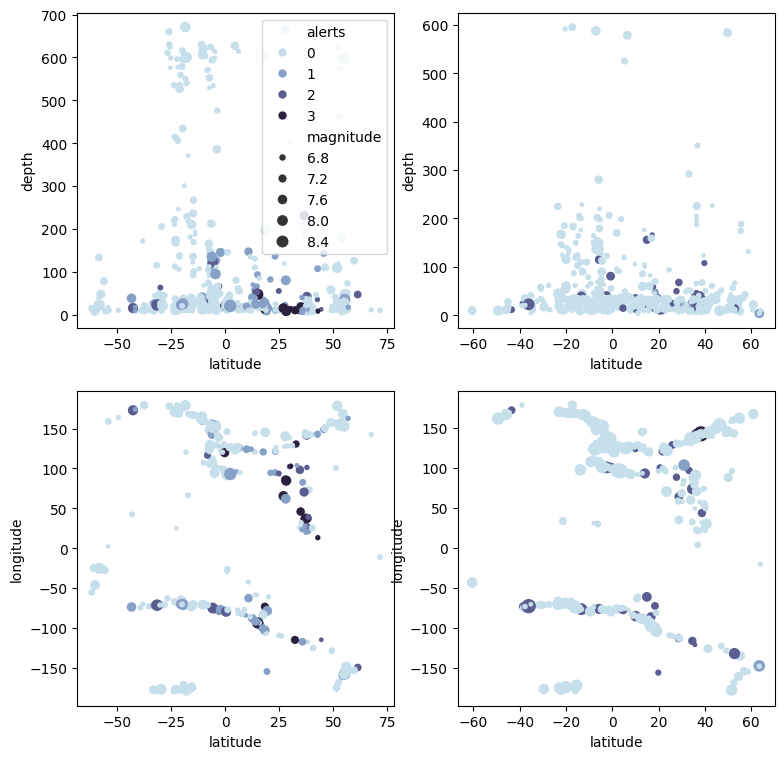

In [43]:
f, ax = plt.subplots(2,2,figsize=(9, 9))
sns.scatterplot(x="latitude", y="depth",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend="brief",
                data=x, ax=ax[0,0])
sns.scatterplot(x="latitude", y="depth",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend=None,
                data=x2, ax=ax[0,1])
sns.scatterplot(x="latitude", y="longitude",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 80), linewidth=0,legend=None,
                data=x, ax=ax[1,0])
sns.scatterplot(x="latitude", y="longitude",
                hue="alerts", size="magnitude",
                palette="ch:s=.25,rot=-.25",
                sizes=(12, 120), linewidth=0,legend=None,
                data=x2, ax=ax[1,1])

In [44]:
x.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,6.910468,5.207127,5.703786,0.710468,890.703786,51.846325,2.486120,27.195078,102.904036,0.792320,35.344681
std,0.416514,2.953409,1.610238,0.454051,377.370920,134.349129,2.483083,23.958593,172.584215,28.731532,126.847849
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,3.000000,4.000000,0.000000,691.000000,0.000000,0.749000,16.000000,13.000000,-19.291800,-77.050500
50%,6.800000,6.000000,6.000000,1.000000,755.000000,0.000000,1.778000,21.000000,26.590000,-5.532100,98.533900
75%,7.100000,8.000000,7.000000,1.000000,912.000000,0.000000,3.619000,32.000000,93.000000,19.419300,151.771000
max,8.600000,9.000000,9.000000,1.000000,2910.000000,770.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [45]:
x2.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,6.964338,2.299456,6.290381,0.010889,813.047187,309.689655,0.016165,15.817967,51.558310,7.186574,64.640316
std,0.453958,3.036622,1.211715,0.103876,216.176043,243.279286,0.200799,23.601172,75.060747,24.446034,107.589584
min,6.500000,0.000000,3.000000,0.000000,650.000000,0.000000,0.000000,0.000000,4.200000,-60.532000,-179.376000
25%,6.600000,0.000000,6.000000,0.000000,677.500000,0.000000,0.000000,0.000000,17.200000,-8.200500,-70.137500
50%,6.800000,0.000000,6.000000,0.000000,737.000000,357.000000,0.000000,13.700000,31.000000,-0.544000,120.982000
75%,7.200000,5.000000,7.000000,0.000000,853.000000,492.000000,0.000000,23.900000,42.600000,28.554000,145.591500
max,9.100000,9.000000,10.000000,1.000000,2184.000000,934.000000,4.121000,220.000000,595.000000,63.980000,178.331000
